In [2]:
# Import dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from config import api_key

ModuleNotFoundError: No module named 'config'

## Unemployment Data by month for 2020 - 2023
- Data is sourced from the Bureau of Labor Statistics (BLS) API
- Inlcudes unemployment rate for CA, FL, NY, TX, WA and National.

In [ ]:
# Set base URL
url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'

In [ ]:
# Entering unemployment rates by states into dictionary so they can remain easily identifiable, and to also be used
# in the DataFrame to give names to columns
series_dict = {
    'LASST060000000000003': 'California',
    'LASST120000000000003': 'Florida',
    'LASST480000000000003': 'Texas',
    'LASST530000000000003': 'Washington',
    'LASST360000000000003': 'New York',
    'LNS14000000':'National'
}

# Follow specific format in BLS API format, requiring establishment of headers
headers = {'Content-type': 'application/json'}

In [ ]:
# Parameters dictionary
data = json.dumps({
    'seriesid':list(series_dict.keys()), #retrieves list of the dictionary keys from series_dict
    'startyear':2020,
    'endyear':2023,
    'registrationkey':api_key})

In [3]:
# Use requests.post to submit the request to BLS API
bls = requests.post(f"{url}?",headers=headers,data=data).json()['Results']['series'] 

NameError: name 'url' is not defined

In [4]:
# pretty print to get a clearer look at the json
print(json.dumps(bls, indent=4, sort_keys=True))

NameError: name 'bls' is not defined

In [5]:
# define function to collect all unemployment rates for 2020-2023 (stored in 'value' key)
def BLS_Unemployment(name):
    data = [] # define list to store data
    for x in range(len(bls)): # first loop through every element in bls
        if name == bls[x]['seriesID']: # if name = seriesID, then
            for y in range(len(bls[x]['data'])): # loop through the data key in that bls element
                data.append(float(bls[x]['data'][y]['value'])) # append data to list
    return data

In [6]:
# run function on each state
california = BLS_Unemployment('LASST060000000000003')
florida = BLS_Unemployment('LASST120000000000003')
texas = BLS_Unemployment('LASST480000000000003')
washington = BLS_Unemployment('LASST530000000000003')
new_york = BLS_Unemployment('LASST360000000000003')
national = BLS_Unemployment('LNS14000000')

# create list of months using list comprehension
month_string = [f"{x['year']}-{x['period'][1:]}-01" for x in bls[0]['data']]

NameError: name 'bls' is not defined

- BD Economics was a useful reference in navigating the BLS API, specifically: https://www.bd-econ.com/blsapi.html

In [7]:
# create DataFrame
unemployment_df = pd.DataFrame({
    "Month":pd.to_datetime(month_string), # cast string into datetime
    "California":california,
    "Florida":florida,
    "Texas":texas,
    "Washington":washington,
    "New York":new_york,
    "National":national
})

# Sort by ascending date, reset index
unemployment_df = (unemployment_df.sort_values("Month",ascending=True)).reset_index(drop=True)

# Display preview
unemployment_df.tail()

NameError: name 'month_string' is not defined

### Statistical summary of unemployment rates, 2020-2023

In [8]:
# Display statistical analysis of unemployment rate, by month 2020-2023
unemployment_df.iloc[:,1:].describe()

NameError: name 'unemployment_df' is not defined

In [9]:
# Above statistical table shows that data is not normally distributed, therefore the mean is not a good summary
# of the data. We used a boxplot to confirm that.
unemployment_df.boxplot(['California','Florida','New York','Texas','Washington'], grid=False) 
plt.show()

NameError: name 'unemployment_df' is not defined

In [10]:
# We opted for the median to get a summary of the data
unemployment_df.iloc[:,1:].median()

NameError: name 'unemployment_df' is not defined

In [11]:
# Calculate differences between months, insert into new DataFrame
differences_in_unemployment = unemployment_df.iloc[:,1:].diff(periods=1,axis=0)

# Add months column, reorganize columns, cast months as datetime
differences_in_unemployment['Month'] = unemployment_df['Month'].values.tolist()
differences_in_unemployment = differences_in_unemployment[['Month','California','Florida','Texas','Washington','New York','National']]
differences_in_unemployment = differences_in_unemployment.astype({'Month':'datetime64[ns]'})

# Fill NaN (first row) with zeroes.
differences_in_unemployment = differences_in_unemployment.fillna(0)

NameError: name 'unemployment_df' is not defined

In [12]:
# Display dataframe that shows changes in unemployment over the months of 2020 - 2023
differences_in_unemployment

NameError: name 'differences_in_unemployment' is not defined

In [13]:
# Plot based on unemployment_df
plt.plot(unemployment_df['Month'],unemployment_df['California'])
plt.plot(unemployment_df['Month'],unemployment_df['Florida'])
plt.plot(unemployment_df['Month'],unemployment_df['Texas'])
plt.plot(unemployment_df['Month'],unemployment_df['New York'])
plt.plot(unemployment_df['Month'],unemployment_df['Washington'])
plt.plot(unemployment_df['Month'],unemployment_df['National'])
plt.legend(['California','Florida','Texas','New York','Washington','National'])
plt.title('Unemployment through 2020-2023')
plt.ylabel("Unemployment Rate")
plt.xlabel("Time")
plt.xticks(rotation=70)

# Save graph as png file
plt.savefig(f'output/Unemployment_Rates_2020-2023.png')

# Display chart
plt.show()

NameError: name 'unemployment_df' is not defined

In [14]:
# Export unemployment_df into a csv
unemployment_df.to_csv("output/unemployment_rates_2020-2023.csv",index=False)

NameError: name 'unemployment_df' is not defined

### Unemployment Analysis:
- Florida (the state with the least COVID-19 restrictions in our dataset) seems to have maintained the lowest unemployment percentages throughout the years of 2020-2023.
- Expand (if necessary)

# Quarterly GDP for CA, FL, NY, TX, WA and US - 2020-2023
- Data sourced from U.S. Department of Commerce - Bureau of Economic Analysis
- https://www.bea.gov/

In [15]:
# Read CSV files
gdp_csv = ("../Data/GDP_2020-2023_quarterly.csv")
gdp_df = pd.read_csv(gdp_csv)

industry_csv = ("../Data/Quarterly_GDP_Industry_By_State_2020-2023.csv")
industry_df = pd.read_csv(industry_csv, skiprows=3)

In [16]:
# Clear blank spaces in cells so we can cast values to float64
for column in gdp_df.columns:
    gdp_df[column] = gdp_df[column].str.strip()
# Remove commas from US - Washington columns, cast as float
for column in (gdp_df.columns)[1:]:
    gdp_df[column] = gdp_df[column].str.replace(',','').astype(float)

In [17]:
# Rename columns to remove extra spaces
gdp_df = gdp_df.rename(columns = {' United States ':'United States',' California ':'California',' Florida ':'Florida',
                         ' New York ':'New York',' Texas ':'Texas',' Washington ':'Washington'})

In [18]:
# Display preview (values are presented in millions of dollars)
gdp_df

,Quarter,United States,California,Florida,New York,Texas,Washington
0,2020:Q1,21727657.0,3118522.7,1152589.9,1821606.8,1840874.8,619251.6
1,2020:Q2,19935444.0,2871237.9,1066451.9,1660253.4,1676440.7,584351.8
2,2020:Q3,21684551.0,3126987.5,1166652.6,1790068.9,1819976.6,637585.2
3,2020:Q4,22068767.0,3190272.4,1182323.3,1821550.1,1871282.8,639342.9
4,2021:Q1,22656793.0,3279904.9,1220392.1,1840547.4,1957009.4,662224.7
5,2021:Q2,23368861.0,3376467.2,1276526.3,1897462.8,2045172.0,685605.8
6,2021:Q3,23921991.0,3465519.5,1320150.4,1938860.2,2120880.3,691182.0
7,2021:Q4,24777038.0,3573941.6,1377455.9,2016782.7,2232827.4,711796.8
8,2022:Q1,25215491.0,3591071.1,1400023.1,2025436.9,2323836.7,720503.4
9,2022:Q2,25805791.0,3641685.3,1442829.2,2029181.6,2433824.2,732415.3


In [19]:
# Statistical analysis of GDP figures
gdp_df.iloc[:,1:].describe()

,United States,California,Florida,New York,Texas,Washington
count,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,16.000000
mean,2.469072e+07,3.507877e+06,1.376682e+06,1.980388e+06,2.227977e+06,714652.306250
std,2.575257e+06,3.179839e+05,1.845896e+05,1.620174e+05,3.241438e+05,74126.124362
min,1.993544e+07,2.871238e+06,1.066452e+06,1.660253e+06,1.676441e+06,584351.800000
25%,2.250979e+07,3.257497e+06,1.210875e+06,1.835812e+06,1.935578e+06,656504.250000
50%,2.499626e+07,3.582506e+06,1.388740e+06,2.021110e+06,2.278332e+06,716150.100000
75%,2.684180e+07,3.742068e+06,1.537711e+06,2.100794e+06,2.518272e+06,772876.500000
max,2.829697e+07,3.936165e+06,1.642249e+06,2.207141e+06,2.647608e+06,831911.300000


In [20]:
# Calculate percent change for each column
gdp_df['US % Change'] = gdp_df['United States'].pct_change()
gdp_df['CA % Change'] = gdp_df['California'].pct_change()
gdp_df['FL % Change'] = gdp_df['Florida'].pct_change()
gdp_df['NY % Change'] = gdp_df['New York'].pct_change()
gdp_df['TX % Change'] = gdp_df['Texas'].pct_change()
gdp_df['WA % Change'] = gdp_df['Washington'].pct_change()

# Reorganize columns
gdp_pc = gdp_df[['Quarter','CA % Change','FL % Change','NY % Change','TX % Change','WA % Change','US % Change']]

# Drop first row (NaN)
gdp_pc = gdp_pc.iloc[1:,:]

# Display dataframe
gdp_pc

,Quarter,CA % Change,FL % Change,NY % Change,TX % Change,WA % Change,US % Change
1,2020:Q2,-0.079295,-0.074734,-0.088578,-0.089324,-0.056358,-0.082485
2,2020:Q3,0.089073,0.093957,0.078190,0.085619,0.091098,0.087739
3,2020:Q4,0.020238,0.013432,0.017587,0.028191,0.002757,0.017718
4,2021:Q1,0.028096,0.032198,0.010429,0.045812,0.035790,0.026645
5,2021:Q2,0.029441,0.045997,0.030923,0.045050,0.035307,0.031428
6,2021:Q3,0.026374,0.034174,0.021817,0.037018,0.008133,0.023670
7,2021:Q4,0.031286,0.043408,0.040190,0.052783,0.029825,0.035743
8,2022:Q1,0.004793,0.016383,0.004291,0.040760,0.012232,0.017696
9,2022:Q2,0.014094,0.030575,0.001849,0.047330,0.016533,0.023410
10,2022:Q3,0.012964,0.032660,0.017053,0.018029,0.023216,0.018066


In [21]:
# Statistical analysis of percent change in GDP, quarterly 2020 - 2023
gdp_pc.describe()

,CA % Change,FL % Change,NY % Change,TX % Change,WA % Change,US % Change
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.016164,0.024427,0.013428,0.025211,0.020272,0.018297
std,0.033254,0.034016,0.033876,0.038029,0.029318,0.033475
min,-0.079295,-0.074734,-0.088578,-0.089324,-0.056358,-0.082485
25%,0.008798,0.017342,0.007364,0.014555,0.014382,0.016841
50%,0.016615,0.025752,0.015604,0.028191,0.020151,0.018066
75%,0.027235,0.033417,0.020123,0.045431,0.028177,0.025157
max,0.089073,0.093957,0.078190,0.085619,0.091098,0.087739


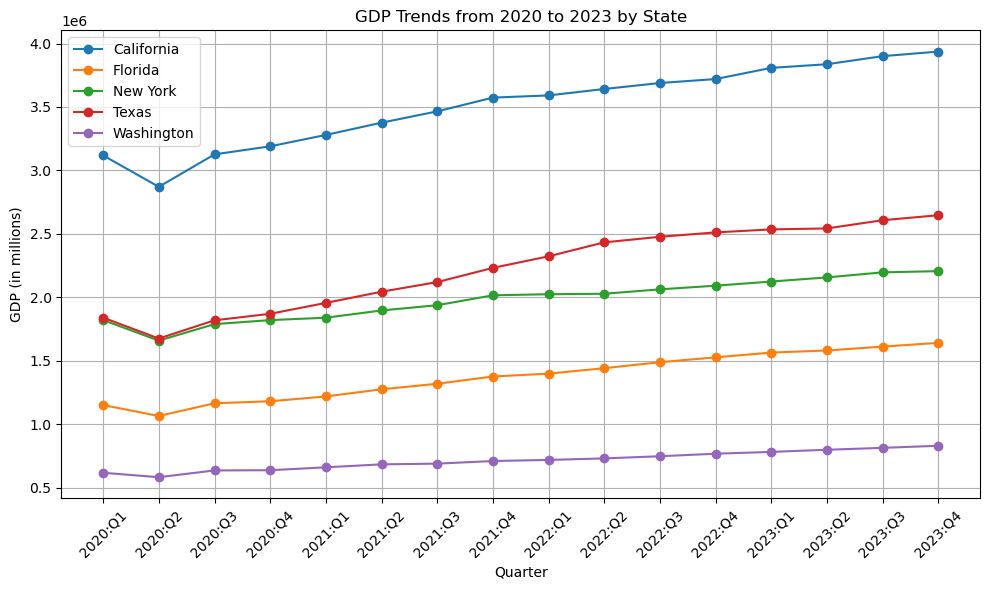

In [22]:
# Create line plots for each state from 2020 to 2023
plt.figure(figsize=(10, 6))
for state in ['California', 'Florida', 'New York', 'Texas', 'Washington']:
    plt.plot(gdp_df['Quarter'], gdp_df[state], marker='o', label=state)

# Add plot details
plt.title("GDP Trends from 2020 to 2023 by State")
plt.xlabel("Quarter")
plt.ylabel("GDP (in millions)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save figure
plt.savefig("output/GDP_2020-2023.png")

# Display the plot
plt.show()

## Industry breakdown of GDP

In [23]:
# Preview dataframe
industry_df

,GeoFips,GeoName,LineCode,Description,2020:Q1,2020:Q2,2020:Q3,2020:Q4,2021:Q1,2021:Q2,2021:Q3,2021:Q4,2022:Q1,2022:Q2,2022:Q3,2022:Q4,2023:Q1,2023:Q2,2023:Q3,2023:Q4
0,6000,California,1.0,All industry total,3118522.7,2871237.9,3126987.5,3190272.4,3279904.9,3376467.2,3465519.5,3573941.6,3591071.1,3641685.3,3688897.5,3720008.9,3808244.2,3836679.8,3900426.7,3936165.1
1,6000,California,2.0,Private industries,2759259.4,2521761.5,2768349.1,2833621.2,2915463.2,3009396.7,3091048.3,3199317.3,3216875.9,3266071.4,3305247.5,3333024.5,3409034.0,3433178.7,3489861.2,3520636.1
2,6000,California,3.0,"Agriculture, forestry, fishing and hunting",35105.6,38280.5,40365.0,42531.6,37807.2,40639.4,43821.9,51268.9,46088.0,46381.2,47584.0,52614.1,46792.6,49548.2,48382.0,48126.3
3,6000,California,6.0,"Mining, quarrying, and oil and gas extra...",8013.2,5465.3,7760.4,7618.3,8860.1,9300.3,9973.1,11773.2,11345.0,12969.3,11385.7,11175.2,9863.8,9616.0,10496.2,10167.1
4,6000,California,10.0,Utilities,37989.9,41506.4,44531.2,45383.0,46841.4,45116.5,46683.7,50872.1,47474.8,56451.0,58336.1,53701.3,54601.4,51631.0,52667.4,51391.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,53000,Washington,86.0,State and local,58066.9,55044.3,55896.6,55934.1,58305.5,58463.7,59150.5,58469.5,62008.3,61255.9,62264.5,64385.7,64779.9,66290.2,66964.9,67924.3
135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,Legend/Footnotes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,"1. For levels: millions of dollars, seasonally...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Remove NaN values (last 2 rows)
industry_df = industry_df.dropna()

# Remove blank spaces that are included in strings
industry_df = industry_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Remove aggregate descriptions
industry_df = industry_df[(industry_df['Description'] != 'Private industries') & (industry_df['Description'] != 'All industry total')
& (industry_df['Description'] != 'Manufacturing') & (industry_df['Description'] != 'Government and government enterprises')]

# Rename GeoName to State
industry_df = industry_df.rename(columns = {'GeoName':'State'})

# Drop 'GeoFips' and 'LineCode' columns
industry_df = industry_df.drop(columns=['GeoFips','LineCode'])

# Preview DataFrame
industry_df.head()

,State,Description,2020:Q1,2020:Q2,2020:Q3,2020:Q4,2021:Q1,2021:Q2,2021:Q3,2021:Q4,2022:Q1,2022:Q2,2022:Q3,2022:Q4,2023:Q1,2023:Q2,2023:Q3,2023:Q4
2,California,"Agriculture, forestry, fishing and hunting",35105.6,38280.5,40365.0,42531.6,37807.2,40639.4,43821.9,51268.9,46088.0,46381.2,47584.0,52614.1,46792.6,49548.2,48382.0,48126.3
3,California,"Mining, quarrying, and oil and gas extraction",8013.2,5465.3,7760.4,7618.3,8860.1,9300.3,9973.1,11773.2,11345.0,12969.3,11385.7,11175.2,9863.8,9616.0,10496.2,10167.1
4,California,Utilities,37989.9,41506.4,44531.2,45383.0,46841.4,45116.5,46683.7,50872.1,47474.8,56451.0,58336.1,53701.3,54601.4,51631.0,52667.4,51391.8
5,California,Construction,128749.6,118677.7,127896.8,128552.6,131602.0,131039.0,129881.6,133164.1,141077.8,138948.3,142382.7,146792.0,145337.2,149109.6,152722.6,155291.9
7,California,Durable goods manufacturing,195565.5,186665.8,214693.9,211828.4,223020.1,226828.6,216469.4,225510.7,230335.4,231225.2,230371.2,233509.7,241779.1,243951.8,250297.6,253739.3


In [25]:
# Define lists for new dataframe to capture quarter, state, description and GDP output values - top 3 values in GDP
# for all states in each quarter
state = []
output = []
desc = []
quart = []

# Start with a for loop for the year 2020
for sta in industry_df['State'].unique().tolist():
    for i in range(1,5):
        output.extend(industry_df[industry_df['State']==sta].loc[:,f'2020:Q{i}'].values.tolist())
        state.extend(industry_df[industry_df['State']==sta].loc[:,'State'].values.tolist())
        desc.extend(industry_df[industry_df['State']==sta].loc[:,'Description'].values.tolist())
        quart.extend([f'2020:Q{i}']*23)
        

# Then loop through the 2021
for sta in industry_df['State'].unique().tolist():
    for i in range(1,5):
        output.extend(industry_df[industry_df['State']==sta].loc[:,f'2021:Q{i}'].values.tolist())
        state.extend(industry_df[industry_df['State']==sta].loc[:,'State'].values.tolist())
        desc.extend(industry_df[industry_df['State']==sta].loc[:,'Description'].values.tolist())
        quart.extend([f'2021:Q{i}']*23)
        

# Then loop through the 2022
for sta in industry_df['State'].unique().tolist():
    for i in range(1,5):
        output.extend(industry_df[industry_df['State']==sta].loc[:,f'2022:Q{i}'].values.tolist())
        state.extend(industry_df[industry_df['State']==sta].loc[:,'State'].values.tolist())
        desc.extend(industry_df[industry_df['State']==sta].loc[:,'Description'].values.tolist())
        quart.extend([f'2022:Q{i}']*23)
        

# Then loop through the 2023
for sta in industry_df['State'].unique().tolist():
    for i in range(1,5):
        output.extend(industry_df[industry_df['State']==sta].loc[:,f'2023:Q{i}'].values.tolist())
        state.extend(industry_df[industry_df['State']==sta].loc[:,'State'].values.tolist())
        desc.extend(industry_df[industry_df['State']==sta].loc[:,'Description'].values.tolist())
        quart.extend([f'2023:Q{i}']*23)
        



# Create new DataFrame with lists
industry_2 = pd.DataFrame({"Quarter":quart,
                   "State":state,
                   "Description":desc,
                   "GDP Output":output})



In [26]:
# Display preview new dataframe
industry_2.head()

,Quarter,State,Description,GDP Output
0,2020:Q1,California,"Agriculture, forestry, fishing and hunting",35105.6
1,2020:Q1,California,"Mining, quarrying, and oil and gas extraction",8013.2
2,2020:Q1,California,Utilities,37989.9
3,2020:Q1,California,Construction,128749.6
4,2020:Q1,California,Durable goods manufacturing,195565.5


In [27]:
# Define funciton that will plot industry GDP by state for years 2020 - 2023

def gdp_sectors(state):

    # Filter df to state, groupby Description, get sum of GDP, insert into list for x values
    values = list(industry_2[industry_2['State']== state].groupby(['Description']).sum()['GDP Output'].sort_values(ascending=False))
    # insert keys of groupby project into list for y values
    y = list(industry_2[industry_2['State']== state].groupby(['Description']).sum()['GDP Output'].sort_values(ascending=False).keys())

    # Set figure size
    fig, ax = plt.subplots(figsize =(10, 8))

    # Horizontal bar plot
    ax.barh(y,values)

    # Remove x, y ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)

    # Add grid
    plt.grid(axis = 'x')

    # Invert y axis
    ax.invert_yaxis()

    # Additional formatting
    plt.xlabel('GDP (in Millions of Dollars)')
    plt.ylabel('Sector')
    plt.title(f'{state} GDP Contribution by Sector in Millions of Dollars, 2020-2023')
    plt.xticks(rotation=40)
    plt.ticklabel_format(style='plain', axis='x')

    # Save plot as png
    plt.savefig(f'output/GDP_By_Inudstry_2020-2023_{state}.png')

    # Display plot
    plt.show()

For plotting section in cell above, we used the website "geeksforgeeks" as a reference. Direct page to reference: https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

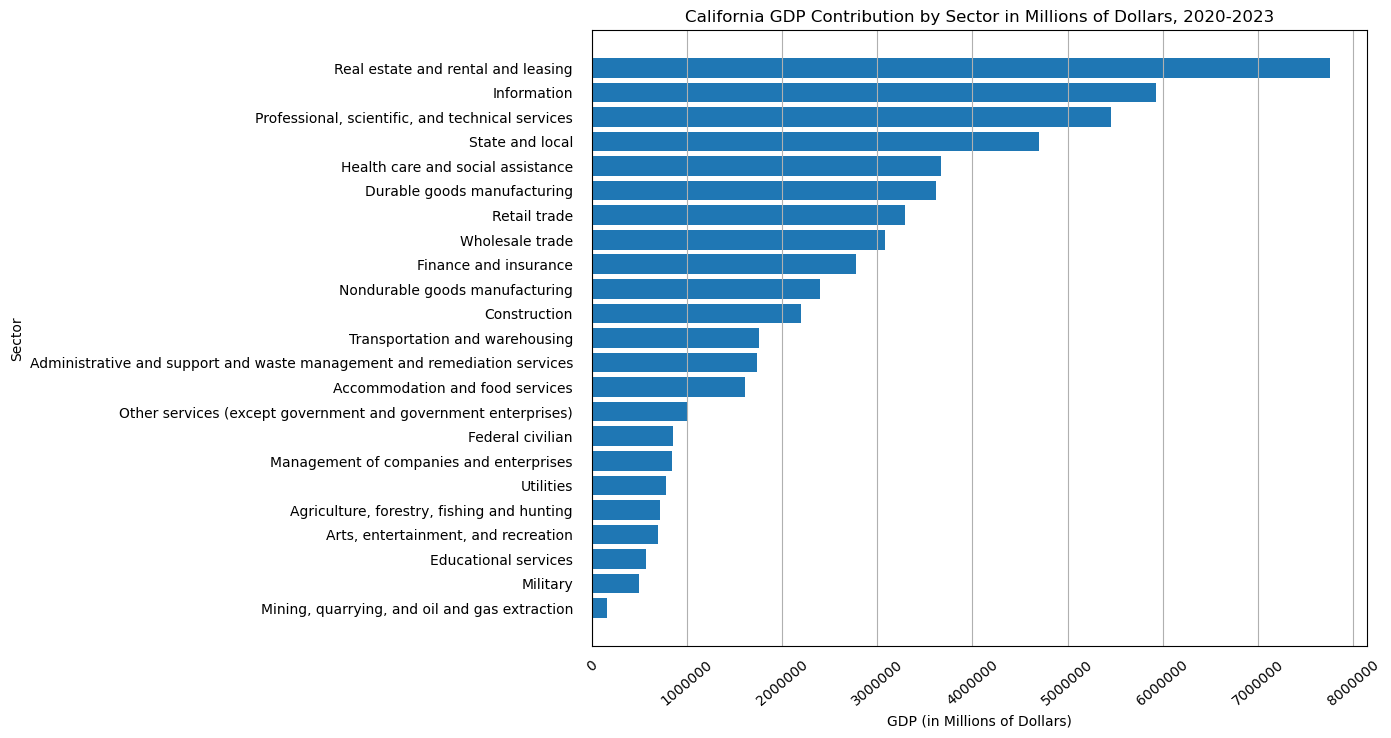

In [28]:
gdp_sectors('California')

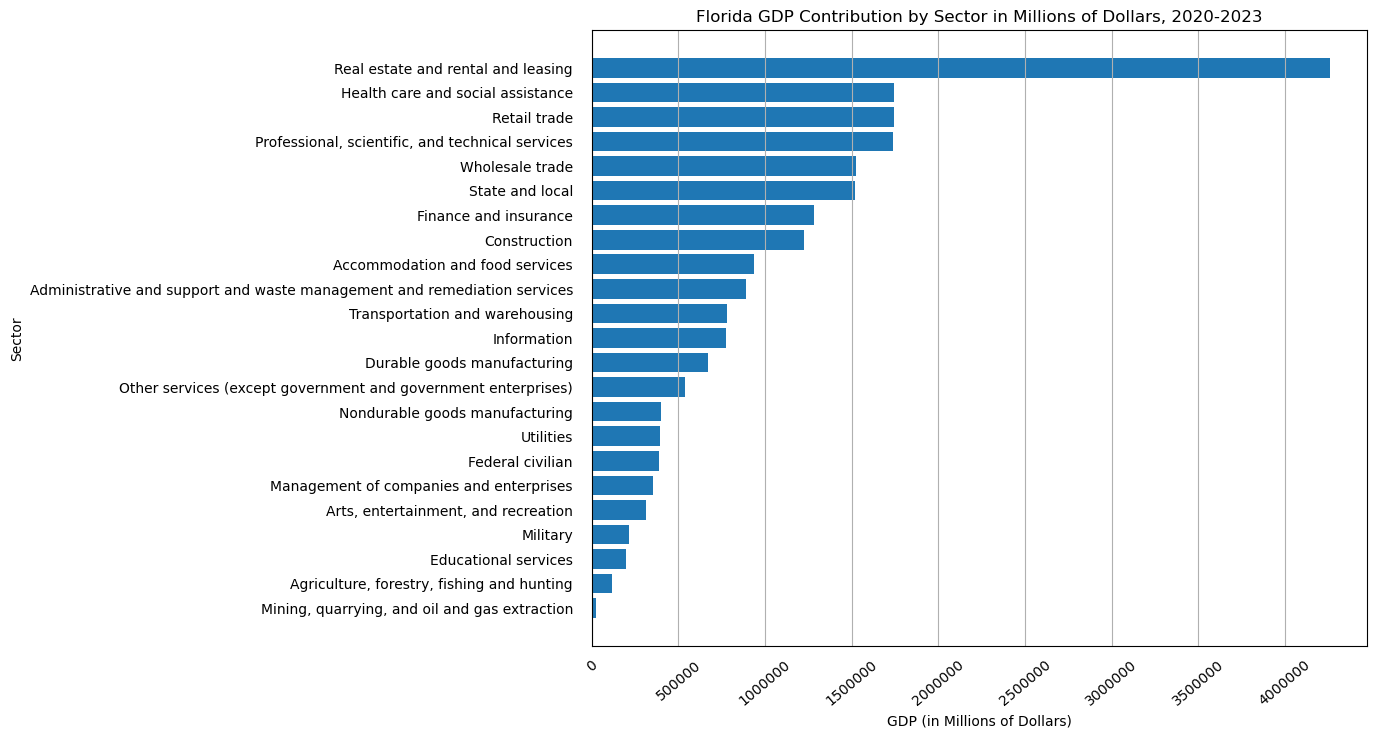

In [29]:
gdp_sectors('Florida')

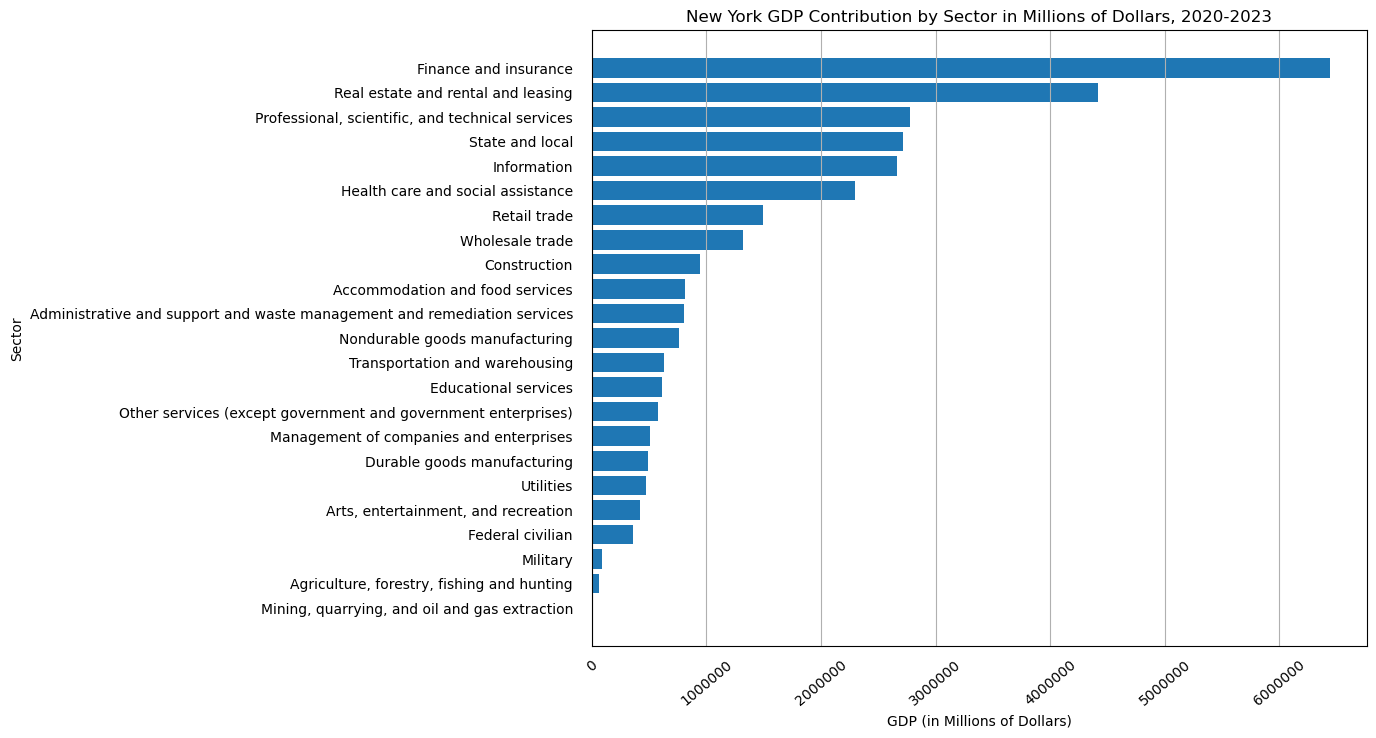

In [30]:
gdp_sectors('New York')

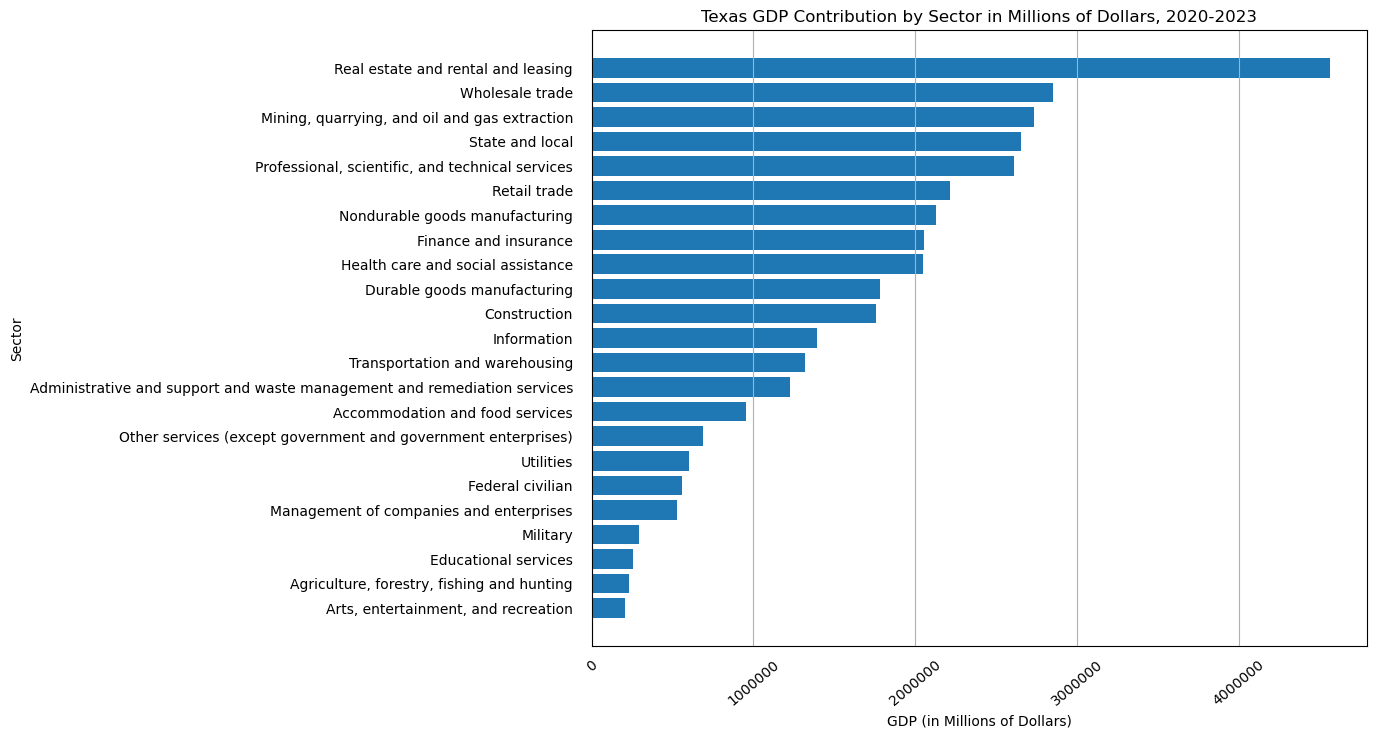

In [31]:
gdp_sectors('Texas')

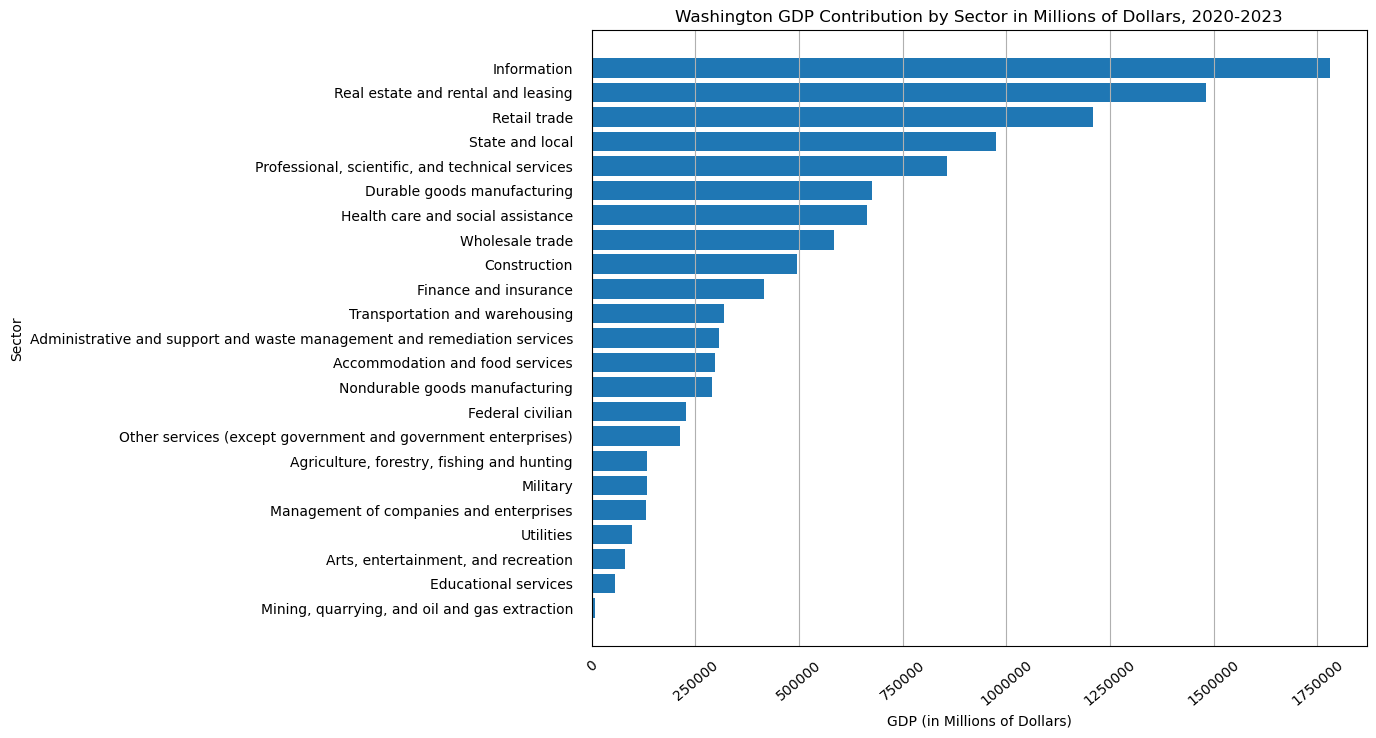

In [32]:
gdp_sectors('Washington')

### Analysis on GDP
- If we accept the mean GDP percent change as a good summary of the data, then Texas and Florida did perform better in this metric.
- Expand

## Is there a linear relationship between GDP and Unemployment?
In this section, we want to examine the relationships between GDP and Unemployment in each state through 2020 - 2023. We acknowledge that this is a very limited data set since we're only able to source quarterly data for most of the variables we're examining.

In [33]:
# Import and read unemployment csv file into dataframe
unemployment_csv = ("output/unemployment_rates_2020-2023.csv")
unemployment_df = pd.read_csv(unemployment_csv)
unemployment_df = unemployment_df.astype({'Month':'datetime64[ns]'})
unemployment_df = unemployment_df.set_index("Month")

# Resample data monthly data into quarterly to do a scatterplot with GDP; Using median since the data is not regularly
# distributed
quarterly_df = unemployment_df.resample('QE').mean()

# Preview df
quarterly_df.head()

,California,Florida,Texas,Washington,New York,National
Month,,,,,,
2020-03-31,4.733333,3.366667,4.033333,4.233333,4.133333,3.833333
2020-06-30,15.233333,13.133333,11.500000,13.866667,15.300000,13.000000
2020-09-30,11.700000,9.566667,8.366667,9.100000,11.166667,8.800000
2020-12-31,9.100000,6.700000,7.000000,6.933333,8.966667,6.733333
2021-03-31,8.566667,5.633333,6.566667,6.200000,8.366667,6.233333


In [34]:
# Define function to plot linear regression of quarterly state GDP vs quarterly state unemployment rate, 2020-2023
def gdp_regress(state):
    # Set y and x axes
    x = gdp_df[state]
    y = quarterly_df[state]

    # Create scatter plot
    plt.scatter(x,y)
    # Calculate linear regression
    (slope,intercept,rvalue,pvalue,stderr) = linregress(x,y)
    regress_values = x * slope + intercept

    # Create string of line equation
    line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

    # Plot the line
    plt.plot(x,regress_values,"r-")

    # Format graphs
    plt.ylabel('Unemployment Rate')
    plt.xlabel('GDP (millions)')
    plt.title(f'{state} GDP vs Unemployment Rate, 2020-2023')
    plt.annotate(line_eq,xy=(gdp_df[state].min(),quarterly_df[state].min()),fontsize=15,color="red")

    # Print pearson coefficient
    print(f"The r^2 value is: {rvalue**2}")

    # Save the graph as a png
    plt.savefig(f'output/Linear_Unemployment_GDP_{state}') # save fig as png
    
    # Display plot
    plt.show()

The r^2 value is: 0.6534955455640314


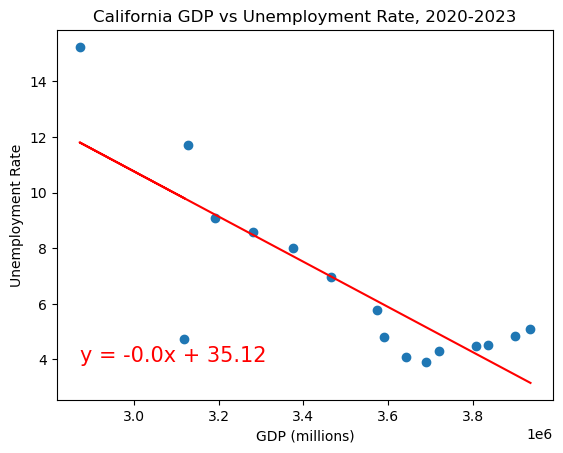

In [35]:
gdp_regress('California')

The r^2 value is: 0.635150687176309


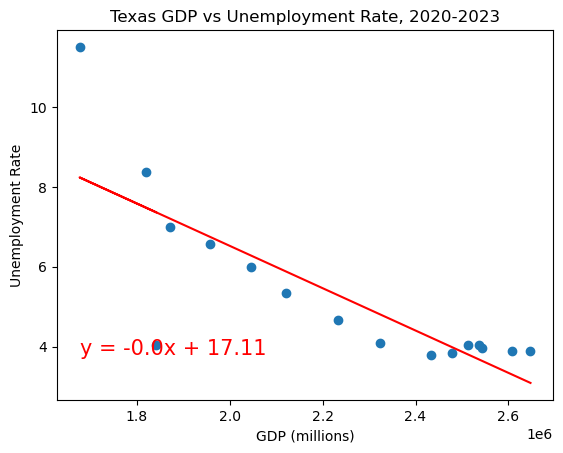

In [36]:
gdp_regress('Texas')

The r^2 value is: 0.5757017087603803


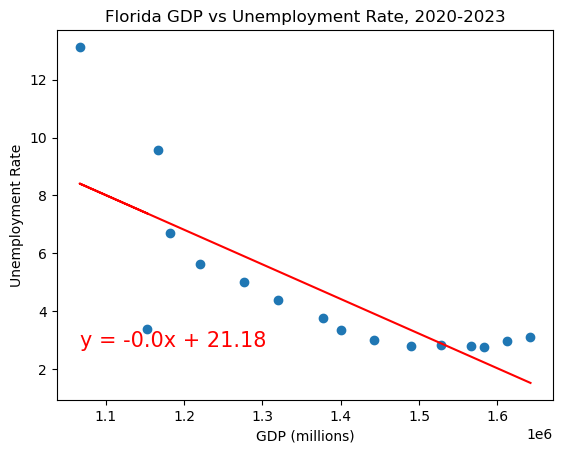

In [37]:
gdp_regress('Florida')

The r^2 value is: 0.6839234732683744


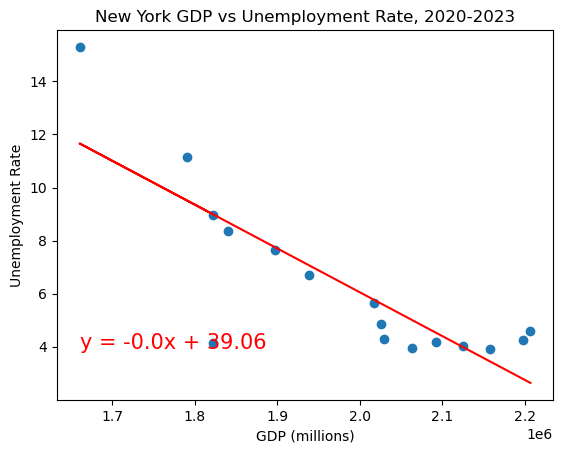

In [38]:
gdp_regress('New York')

The r^2 value is: 0.4826516178704578


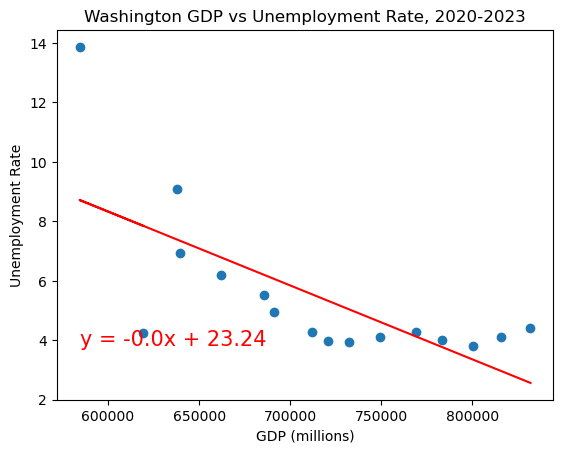

In [39]:
gdp_regress('Washington')

### Correlation Commentary
enter comment

# Personal Income per Capita and Poverty Rate
- Personal Income was sourced from Dept of Commerce - Bureau of Economic Analysis
- Poverty Rate was sourced from the Census webiste

In [42]:
# Read CSV files
# Poverty rate and population estimates. This is yearly data
poverty_data = ("../Data/Poverty_Data_Census_2020-2023.csv")
poverty_df = pd.read_csv(poverty_data)

# Per Capita Personal Income - This is quarterly data
personal_income = ("../Data/Quarterly_Per_Capita_Personal_Income_2020-2023.csv")
income_df = pd.read_csv(personal_income)


In [43]:
# Preview income_df
income_df

,GeoFips,GeoName,2020:Q1,2020:Q2,2020:Q3,2020:Q4,2021:Q1,2021:Q2,2021:Q3,2021:Q4,2022:Q1,2022:Q2,2022:Q3,2022:Q4,2023:Q1,2023:Q2,2023:Q3,2023:Q4
0,0,United States,56595,60862,59742,59271,66742,63332,63609,64106,64766,65577,66822,67766,68684,69519,70140,70851
1,6000,California,66330,70512,72381,71363,78904,75699,76411,76261,75718,76032,77316,78658,79882,80970,81711,82408
2,12000,Florida,54623,58120,56829,56522,64412,60965,61225,62132,62542,63850,65426,66445,67737,68450,68870,69674
3,19000,Iowa,50072,54981,52333,53060,60425,57884,57479,57112,59942,61034,62515,62768,62417,62421,63021,63219
4,36000,New York,67345,72304,71836,69991,78487,74921,75068,75458,75781,76635,77936,79510,80213,82041,83247,83753
5,48000,Texas,53152,56358,55101,54613,62031,58871,59305,60504,61157,62427,63808,64522,65560,65860,66433,67093
6,50000,Vermont,55786,61509,57785,57243,64184,59713,59665,59933,61980,63041,64067,65408,65953,66818,66938,67991
7,53000,Washington,65145,69670,68225,67770,75634,72903,72680,73284,74232,74885,76222,77430,79061,80727,81359,82531


In [44]:
# Clean up income_df

# Remove GeoFips column
income_df = income_df.iloc[:,1:]

# Remove extra Vermont and Iowa from dataframe
income_df = income_df[(income_df['GeoName'] != 'Iowa') & (income_df['GeoName'] != 'Vermont')]

# Transpose the DataFrame
income_df = income_df.T

# Rename columns to country names
income_df = income_df.rename(columns=income_df.iloc[0])

# Reset Index
income_df = income_df.reset_index(names="Quarters")

# Remove first row
income_df = income_df.iloc[1:,:]

# Year splice + quarter splice loop
year = []
quarter = []
for i in income_df.iloc[:,0]:
    year.append(i[:4])
    quarter.append(i[5:])

# Insert columns into dataframe
income_df.insert(1,"Quarter",quarter)
income_df.insert(2,"Year",year)


# Preview income_df
income_df.head()

,Quarters,Quarter,Year,United States,California,Florida,New York,Texas,Washington
1,2020:Q1,Q1,2020,56595,66330,54623,67345,53152,65145
2,2020:Q2,Q2,2020,60862,70512,58120,72304,56358,69670
3,2020:Q3,Q3,2020,59742,72381,56829,71836,55101,68225
4,2020:Q4,Q4,2020,59271,71363,56522,69991,54613,67770
5,2021:Q1,Q1,2021,66742,78904,64412,78487,62031,75634


In [45]:
# Cast all columns, from US to WA, as float
for column in (income_df.columns)[3:]:
    income_df[column] = income_df[column].astype(float)

In [46]:
# Statistical summary of income
income_df.describe()

,United States,California,Florida,New York,Texas,Washington
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,64899.000000,76284.750000,62988.875000,76532.875000,61049.687500,74484.875000
std,4184.319188,4381.899809,4718.035621,4685.974632,4478.184479,5079.557302
min,56595.000000,66330.000000,54623.000000,67345.000000,53152.000000,65145.000000
25%,62714.500000,74869.500000,60253.750000,74266.750000,58242.750000,71927.500000
50%,65171.500000,76336.000000,63196.000000,76208.000000,61594.000000,74558.500000
75%,67995.500000,79148.500000,66768.000000,79685.750000,64781.500000,77837.750000
max,70851.000000,82408.000000,69674.000000,83753.000000,67093.000000,82531.000000


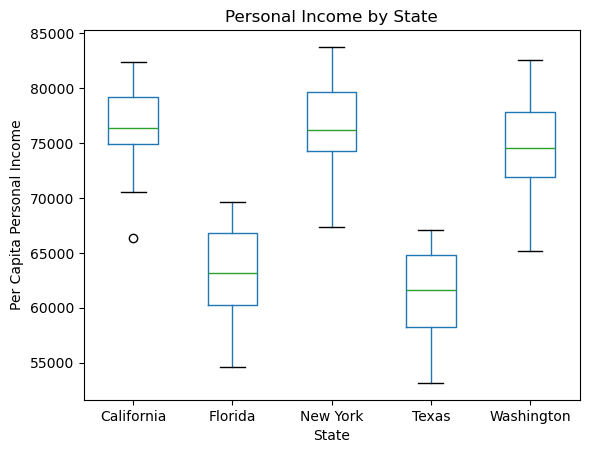

In [47]:
# Create a box plot 
income_df.boxplot(['California','Florida','New York','Texas','Washington'], grid=False) 
# Adding title and labels 
plt.title('Personal Income by State') 

# Suppress the default title 
plt.xlabel('State') 
plt.ylabel('Per Capita Personal Income') 
# Show plot 
plt.show()

In [48]:
# Calculate percent change in income per capita
income_df['US % Change'] = income_df['United States'].pct_change()
income_df['CA % Change'] = income_df['California'].pct_change()
income_df['FL % Change'] = income_df['Florida'].pct_change()
income_df['NY % Change'] = income_df['New York'].pct_change()
income_df['TX % Change'] = income_df['Texas'].pct_change()
income_df['WA % Change'] = income_df['Washington'].pct_change()

# Filter these columns into a new dataframe
income_pc = income_df[['US % Change','CA % Change','FL % Change','NY % Change','TX % Change','WA % Change']]

# Remove PC change columns from income_df
income_df = income_df.iloc[:,0:9]

In [49]:
# Display summary statistics for % Change in personal income per capita
income_pc.describe()

,US % Change,CA % Change,FL % Change,NY % Change,TX % Change,WA % Change
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.015797,0.015075,0.017141,0.015315,0.016387,0.016469
std,0.039873,0.033396,0.042086,0.038847,0.040805,0.035906
min,-0.051092,-0.040619,-0.053515,-0.045434,-0.050942,-0.036108
25%,0.006094,0.001092,0.005200,0.003121,0.005974,0.002385
50%,0.010295,0.009406,0.011674,0.008842,0.010793,0.012936
75%,0.013837,0.017122,0.020179,0.018586,0.020492,0.019459
max,0.126048,0.105671,0.139592,0.121387,0.135828,0.116040


In [50]:
# Plot Personal Income Per Capita
plt.figure(figsize=(10, 6))

for state in ['California', 'Florida', 'New York', 'Texas', 'Washington']:
    plt.plot(income_df['Quarters'], income_df[state], marker='o', label=state)

plt.title("Personal Income Per Capita, by state, 2020-2023")
plt.xlabel("Quarters")
plt.ylabel("Personal Income (Per Capita)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

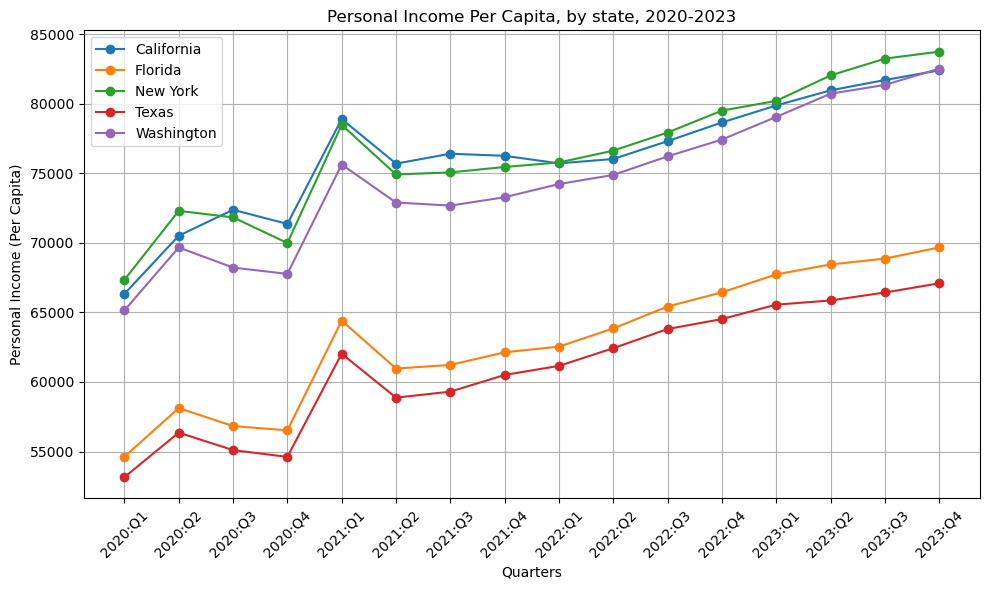

In [51]:
# Display plot
plt.show()

### Analysis on Personal Income per Capita
- enter comment here